# **Multi-class classification of Twitter Financial News using NLP**

## **Importing Data and getting the required libraries**

---



In [ ]:
import pickle

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()#upload json file from kaggle

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"varungujarathi","key":"47dfc01c3b87798e4fe5d7180345820f"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sulphatet/twitter-financial-news

 93% 1.00M/1.08M [00:00<00:00, 1.51MB/s]
100% 1.08M/1.08M [00:00<00:00, 1.61MB/s]


In [ ]:
!mkdir train
!unzip /content/twitter-financial-news.zip -d train

Archive:  /content/twitter-financial-news.zip
  inflating: train/train_data.csv    
  inflating: train/valid_data.csv    


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/train/train_data.csv")
df.head()

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0


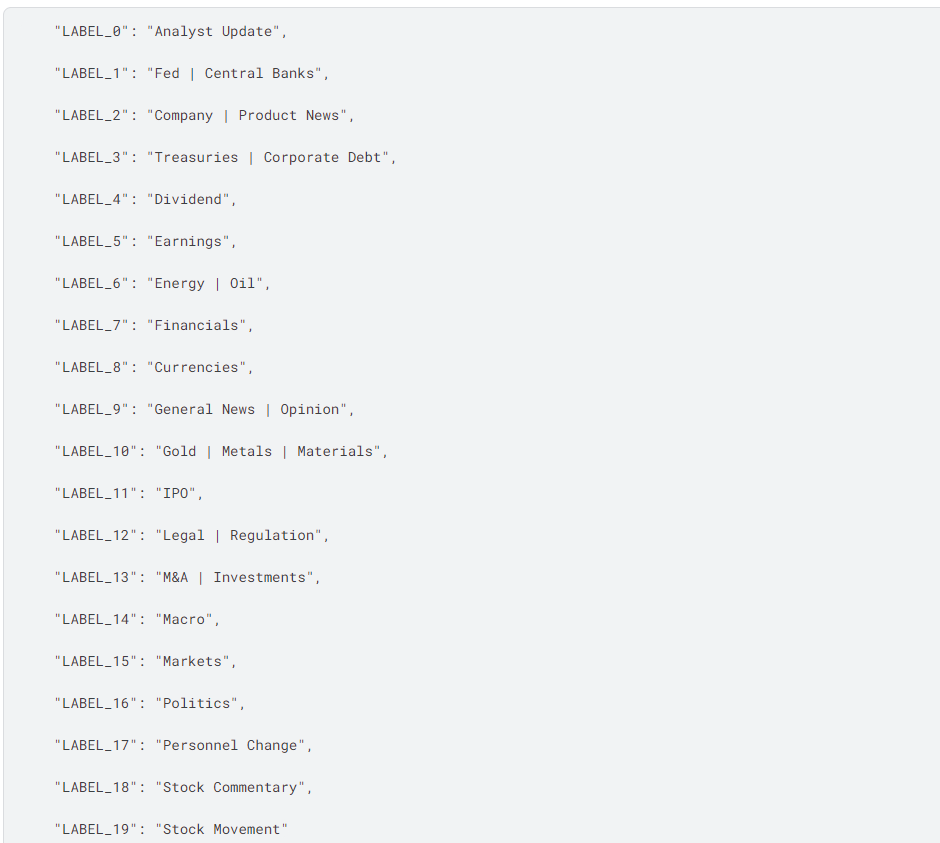

In [ ]:
df.shape

(16990, 2)

In [ ]:
df.info() #Get information about the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16990 entries, 0 to 16989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16990 non-null  object
 1   label   16990 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 265.6+ KB


In [ ]:
df.isnull().sum() #check for missing values

text     0
label    0
dtype: int64

In [ ]:
df.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
df.describe()

,label
count,16990.000000
mean,9.547616
std,6.401000
min,0.000000
25%,2.000000
50%,9.000000
75%,16.000000
max,19.000000


In [ ]:
#checking for duplicates
df.duplicated().sum()

0

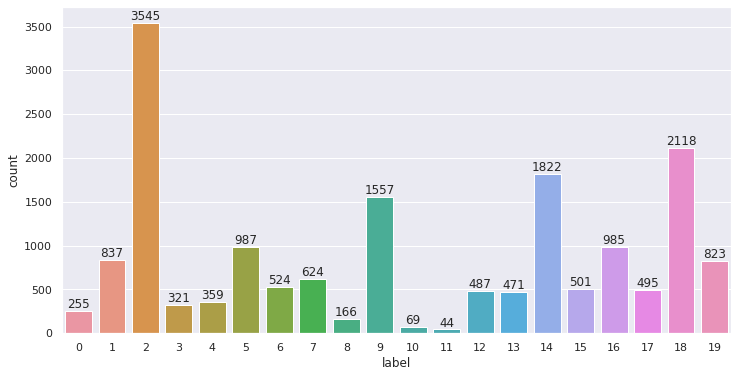

In [ ]:
#check the distribution of target
%matplotlib inline

%matplotlib inline

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

plt.figure(figsize=(12,6))
sns.set()
ax=sns.countplot(data=df, x='label')
ax.bar_label(ax.containers[0])
plt.show(ax)

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

**Wordcloud for the first tweet:**

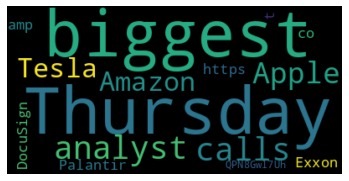

In [ ]:
text = df.text[0]

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text = " ".join(txt for txt in df.text)
print ("There are {} words in the combination of all tweets in the dataset.".format(len(text)))

There are 2321089 words in the combination of all tweets in the dataset.


## **Data cleaning and preprocessing**

---



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re
import string
import plotly.express as px
from collections import Counter
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def clean(text):
            text = str(text).lower()
            text = re.sub('\[.*?\]', '', text)
            text = re.sub('https?://\S+|www\.\S+', '', text)
            text = re.sub('<.*?>+', '', text)
            text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
            text = re.sub('\n', '', text)
            text = re.sub('\w*\d\w*', '', text)
            text = [word for word in text.split(' ') if word not in stopword]
            text=" ".join(text)
            # text = [stemmer.stem(word) for word in text.split(' ')]
            text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
            text=" ".join(text)
            return text
df["text"] = df["text"].apply(clean)
df.head()

,text,label
0,thursday biggest analyst call apple amazon tes...,0
1,buy la vega sand travel singapore build well f...,0
2,piper sandler downgrade docusign sell citing e...,0
3,analyst react tesla latest earnings break what...,0
4,netflix peer set ‘return growth’ analyst say g...,0


In [ ]:
text = " ".join(txt for txt in df.text)
print ("{} words remain after cleaning the dataset".format(len(text)))

1461631 words remain after cleaning the dataset


Lets look at the common words for all the labels in the dataset.

In [ ]:

for i in range(20):
  label0=df[df['label']==i]
  label0['lab'] = label0['text'].apply(lambda x:str(x).split())
  top = Counter([item for sublist in label0['lab'] for item in sublist])
  temp = pd.DataFrame(top.most_common(10))
  temp.columns = ['Common_words','count']
  fig = px.bar(temp,x="count",y="Common_words",title="Common Words in Label"+str(i),color='Common_words')
  
  fig.show()

<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label0['lab'] = label0['text'].apply(lambda x:str(x).split())


<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-25-ec3bb4c6d183>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



From the above graphs it is clear that:

*   Most of the twitter financial news revolves around Companies and their new products followed by general stock discussion. This shows that people are not afraid to voice their opinions regarding stocks and trading views.

*  People are also attentive to macro economics like inflation affecting their daily needs. 


*   We can also sense market shifts when policy changes are introduced by world leaders, such as the President and Prime Minister
*  People often discuss the earnings of the company, quarter results,etc.





**Wordcloud for all the words after cleaning the dataset:**

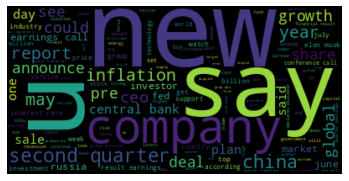

In [ ]:
# Create stopword list:
stpwords = set(stopwords.words('english'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stpwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()
X_cv=cv.fit_transform(df['text'])
X_cv

<16990x21152 sparse matrix of type '<class 'numpy.int64'>'
	with 189753 stored elements in Compressed Sparse Row format>

In [ ]:
X_cv.shape

(16990, 21152)

In [ ]:
y = df["label"]
y

0        0
1        0
2        0
3        0
4        0
        ..
16985    3
16986    3
16987    3
16988    3
16989    3
Name: label, Length: 16990, dtype: int64

### **TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [ ]:
def vectorize(data,tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

In [ ]:
X_tfidf = df['text']
tfidf_vect = TfidfVectorizer()
tfidf_vect_fit=tfidf_vect.fit(X_tfidf)
X_tfidf=vectorize(X_tfidf,tfidf_vect_fit)
X_tfidf

,aa,aad,aaic,aaii,aal,aalberts,aalbf,aam,aampp,aapl,...,zvia,zyme,zymeworks,zyne,zynerba,zynlonta,zynx,zyus,zyversa,åkerström
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Train-test split**

---



In [ ]:
from sklearn.model_selection import train_test_split

### **Train-test split for CountVectorizer**



In [ ]:
X,y = X_cv,df['label']
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size=0.3, random_state=42)

### **Train-test split for TF-IDF**

In [ ]:
X,y = X_tfidf,df['label']
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.3, random_state=42)

## **Fitting Models**
---



### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

**Random Forest on training data that has been vectorized using CountVectorizer**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_cv, y_train_cv)

RandomForestClassifier()

In [ ]:
y_pred_cv = rf.predict(X_test_cv)

In [ ]:
cv_rf_train_accuracy = accuracy_score(y_test_cv, y_pred_cv)
print("Accuracy:", cv_rf_train_accuracy)
print('Classification Report:')
print(classification_report(y_test_cv,y_pred_cv))

Accuracy: 0.7696684324112223
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.37      0.50        79
           1       0.87      0.83      0.85       266
           2       0.75      0.81      0.78      1061
           3       0.85      0.62      0.72       103
           4       0.95      0.91      0.93       121
           5       0.84      0.95      0.89       302
           6       0.81      0.81      0.81       150
           7       0.87      0.85      0.86       186
           8       0.79      0.67      0.73        49
           9       0.76      0.56      0.65       474
          10       1.00      0.39      0.56        28
          11       0.83      0.45      0.59        11
          12       0.87      0.66      0.75       139
          13       0.85      0.52      0.65       146
          14       0.76      0.79      0.78       552
          15       0.75      0.71      0.73       134
          16       0.85      

**Checking performance of RF using CV on Valid_data.csv**

In [ ]:
valid_data = pd.read_csv("/content/train/valid_data.csv")

In [ ]:
X_validation_data = valid_data['text']
X_validation_data

0       Analyst call of the day for @CNBCPro subscribe...
1       Loop upgrades CSX to buy, says it's a good pla...
2       BofA believes we're already in a recession — a...
3       JPMorgan sees these derivative plays as best w...
4       Morgan Stanley's Huberty sees Apple earnings m...
                              ...                        
4112    Dollar bonds of Chinese developers fall as str...
4113    Longer maturity Treasury yields have scope to ...
4114    Pimco buys €1bn of Apollo buyout loans from ba...
4115    Analysis: Banks' snubbing of junk-rated loan f...
4116    U.S. Treasury seeks information on digital ass...
Name: text, Length: 4117, dtype: object

In [ ]:
Y_validation_data = valid_data['label']
Y_validation_data

0       0
1       0
2       0
3       0
4       0
       ..
4112    3
4113    3
4114    3
4115    3
4116    3
Name: label, Length: 4117, dtype: int64

In [ ]:
X_validation_data = X_validation_data.apply(clean)
X_validation_data

0       analyst call day cnbcpro subscriber goldman sa...
1       loop upgrade csx buy say good place park money...
2       bofa belief already recession — say stock take...
3       jpmorgan see derivative play best way bet elec...
4       morgan stanley huberty see apple earnings miss...
                              ...                        
4112    dollar bond chinese developer fall stress spre...
4113    longer maturity treasury yield scope go higher...
4114                pimco buy € apollo buyout loan bank  
4115    analysis bank snubbing junkrated loan fund wor...
4116    u treasury seek information digital asset risk...
Name: text, Length: 4117, dtype: object

1461631 words remain after cleaning the dataset


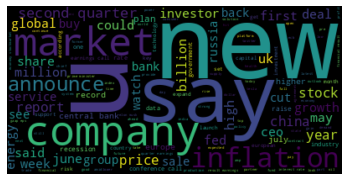

In [ ]:
text_valid_data = " ".join(txt for txt in X_validation_data)
print ("{} words remain after cleaning the dataset".format(len(text)))
wordcloud_valid_data = WordCloud(stopwords=stpwords).generate(text_valid_data)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_valid_data, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
X_validation_data_cv=cv.transform(X_validation_data)
X_validation_data_cv

<4117x21152 sparse matrix of type '<class 'numpy.int64'>'
	with 43931 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred_validation_data_cv = rf.predict(X_validation_data_cv)

In [ ]:
cv_rf_test_accuracy = accuracy_score(Y_validation_data, y_pred_validation_data_cv)
print("Accuracy:", cv_rf_train_accuracy)
print('Classification Report:')
print(classification_report(Y_validation_data,y_pred_validation_data_cv))

Accuracy: 0.7696684324112223
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.41      0.55        73
           1       0.83      0.79      0.81       214
           2       0.74      0.83      0.78       852
           3       0.92      0.58      0.71        77
           4       0.98      0.94      0.96        97
           5       0.81      0.94      0.87       242
           6       0.77      0.75      0.76       146
           7       0.81      0.75      0.78       160
           8       0.80      0.62      0.70        32
           9       0.74      0.53      0.62       336
          10       0.83      0.38      0.53        13
          11       0.90      0.64      0.75        14
          12       0.93      0.66      0.77       119
          13       0.84      0.46      0.59       116
          14       0.74      0.78      0.76       415
          15       0.78      0.66      0.72       125
          16       0.89      

**Accuracy and performance of RandomForest Classifier on Validation Data(pre-processed using CountVectorizer) can be seen above**

**Random Forest on training data that has been vectorized using TF-IDF**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train_tfidf)

RandomForestClassifier()

In [ ]:
y_pred_tfidf = rf.predict(X_test_tfidf)

In [ ]:
tfidf_rf_train_accuracy = accuracy_score(y_test_tfidf, y_pred_tfidf)
print("Accuracy:", tfidf_rf_train_accuracy)
print('Classification Report:')
print(classification_report(y_test_tfidf,y_pred_tfidf))

Accuracy: 0.7726113400039238
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.37      0.51        79
           1       0.86      0.83      0.85       266
           2       0.72      0.83      0.77      1061
           3       0.87      0.66      0.75       103
           4       0.96      0.91      0.93       121
           5       0.84      0.95      0.90       302
           6       0.87      0.79      0.83       150
           7       0.91      0.83      0.87       186
           8       0.94      0.69      0.80        49
           9       0.76      0.57      0.65       474
          10       1.00      0.39      0.56        28
          11       0.83      0.45      0.59        11
          12       0.85      0.70      0.77       139
          13       0.87      0.51      0.64       146
          14       0.78      0.80      0.79       552
          15       0.80      0.68      0.73       134
          16       0.84      

In [ ]:
X_validation_data_tfidf = tfidf_vect.transform(X_validation_data)
words = tfidf_vect_fit.get_feature_names_out()
X_validation_data_tfidf = pd.DataFrame(X_validation_data_tfidf.toarray())
X_validation_data_tfidf.columns = words

In [ ]:
y_validation_data_pred_tfidf = rf.predict(X_validation_data_tfidf)

In [ ]:
tfidf_rf_test_accuracy = accuracy_score(Y_validation_data, y_validation_data_pred_tfidf)
print("Accuracy:", tfidf_rf_test_accuracy)
print('Classification Report:')
print(classification_report(Y_validation_data,y_validation_data_pred_tfidf))

Accuracy: 0.7651202331794996
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.34      0.49        73
           1       0.81      0.82      0.81       214
           2       0.72      0.84      0.77       852
           3       0.88      0.60      0.71        77
           4       0.98      0.95      0.96        97
           5       0.81      0.96      0.88       242
           6       0.78      0.75      0.76       146
           7       0.86      0.76      0.80       160
           8       0.83      0.62      0.71        32
           9       0.75      0.57      0.64       336
          10       0.83      0.38      0.53        13
          11       0.91      0.71      0.80        14
          12       0.92      0.68      0.78       119
          13       0.89      0.47      0.61       116
          14       0.77      0.77      0.77       415
          15       0.84      0.60      0.70       125
          16       0.88      

**Accuracy and performance of RandomForest Classifier on Validation Data(pre-processed using TF-IDF) can be seen above**

### **XGBoost**




In [ ]:
from xgboost import XGBClassifier

**CountVectorizer**

In [ ]:
model = XGBClassifier()
model.fit(X_train_cv, y_train_cv)

predictions = model.predict(X_test_cv)
cv_xgb_train_accuracy = accuracy_score(y_test_cv, predictions)
print('Accuracy: ', cv_xgb_train_accuracy)
print('Classification Report:')
print(classification_report(y_test_cv,predictions))

Accuracy:  0.7775161859917599
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.58      0.64        79
           1       0.88      0.86      0.87       266
           2       0.66      0.87      0.75      1061
           3       0.83      0.70      0.76       103
           4       0.96      0.93      0.95       121
           5       0.90      0.96      0.93       302
           6       0.82      0.85      0.84       150
           7       0.87      0.87      0.87       186
           8       0.65      0.73      0.69        49
           9       0.71      0.54      0.61       474
          10       0.80      0.57      0.67        28
          11       0.92      1.00      0.96        11
          12       0.86      0.73      0.79       139
          13       0.81      0.60      0.69       146
          14       0.79      0.73      0.76       552
          15       0.82      0.69      0.75       134
          16       0.88     

In [ ]:
y_pred_validation_data_cv = model.predict(X_validation_data_cv)

In [ ]:
cv_xgb_test_accuracy = accuracy_score(Y_validation_data, y_pred_validation_data_cv)
print('Accuracy: ', cv_xgb_test_accuracy)
print('Classification Report:')
print(classification_report(Y_validation_data,y_pred_validation_data_cv))

Accuracy:  0.7694923487976683
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.49      0.59        73
           1       0.82      0.80      0.81       214
           2       0.66      0.87      0.75       852
           3       0.87      0.71      0.79        77
           4       0.94      0.99      0.96        97
           5       0.89      0.95      0.92       242
           6       0.79      0.82      0.80       146
           7       0.84      0.81      0.83       160
           8       0.76      0.81      0.79        32
           9       0.66      0.54      0.59       336
          10       0.80      0.62      0.70        13
          11       0.82      1.00      0.90        14
          12       0.91      0.74      0.81       119
          13       0.79      0.55      0.65       116
          14       0.79      0.73      0.76       415
          15       0.81      0.70      0.75       125
          16       0.90     

**TF-IDF**

In [ ]:
model = XGBClassifier()
model.fit(X_train_tfidf, y_train_tfidf)

predictions = model.predict(X_test_tfidf)
tfidf_xgb_train_accuracy = accuracy_score(y_test_tfidf, predictions)
print('Accuracy: ', tfidf_xgb_train_accuracy)
print('Classification Report:')
print(classification_report(y_test_tfidf,predictions))

Accuracy:  0.7675103001765744
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        79
           1       0.85      0.85      0.85       266
           2       0.65      0.88      0.74      1061
           3       0.80      0.73      0.76       103
           4       0.97      0.93      0.95       121
           5       0.89      0.94      0.92       302
           6       0.83      0.80      0.82       150
           7       0.88      0.87      0.87       186
           8       0.71      0.71      0.71        49
           9       0.70      0.54      0.61       474
          10       0.77      0.61      0.68        28
          11       0.90      0.82      0.86        11
          12       0.87      0.75      0.80       139
          13       0.81      0.55      0.65       146
          14       0.79      0.73      0.76       552
          15       0.77      0.68      0.72       134
          16       0.88     

In [ ]:
y_pred_validation_data_tfidf = model.predict(X_validation_data_tfidf)

In [ ]:
tfidf_xgb_test_accuracy = accuracy_score(Y_validation_data, y_pred_validation_data_cv)
print("Accuracy:", tfidf_xgb_test_accuracy)
print('Classification Report:')
print(classification_report(Y_validation_data,y_pred_validation_data_tfidf))

Accuracy: 0.7694923487976683
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.53      0.62        73
           1       0.82      0.83      0.82       214
           2       0.64      0.87      0.74       852
           3       0.92      0.71      0.80        77
           4       0.93      0.95      0.94        97
           5       0.90      0.94      0.92       242
           6       0.79      0.76      0.78       146
           7       0.80      0.79      0.80       160
           8       0.77      0.72      0.74        32
           9       0.68      0.54      0.60       336
          10       0.55      0.46      0.50        13
          11       0.87      0.93      0.90        14
          12       0.88      0.72      0.79       119
          13       0.81      0.54      0.65       116
          14       0.78      0.73      0.75       415
          15       0.71      0.64      0.68       125
          16       0.89      

**Model results summary**

In [ ]:
#conclusion on models
models = pd.DataFrame({
    'Model': 
    ['Random Forest for CountVectorizer','Random Forest for Tf-IDF',
     'XGBoost for CountVectorizer','XGBoost for TF-IDF'],
    
    'Training Accuracy':
    [cv_rf_train_accuracy, tfidf_rf_train_accuracy, cv_xgb_train_accuracy,tfidf_xgb_train_accuracy],
    
    'Model Accuracy Score': 
    [cv_rf_test_accuracy,tfidf_rf_test_accuracy,cv_xgb_test_accuracy, tfidf_xgb_test_accuracy]
})

pd.set_option('precision',3)
models.sort_values(by='Model Accuracy Score', ascending=False)

OptionError: ignored